# Matplotlib: tips and tricks

Author: Simon J. L. Billinge, August 2023

## Setup

### Set up a working environment using conda and conda-forge

* install miniconda (google it)
* create a new environment to work in.  **Working in a terminal** (and replacing things in `<...>` with a name of your choice...
  ```
  conda create -n <env_name> python=3
  ```
* activate the env
  ```
  conda activate <env_name>
  ```
* install jupyterlab, matplotlib, numpy, ipykernal (this allows conda environments to be available in your jupyter notebooks), ipympl (this allows interactive plotting).  
  ```
  conda install -c conda-forge ipykernel jupyterlab matplotlib numpy ipympl
  ```
* Not absolutely necessary in your work, but to make the example sheet work, install the Billinge group matplotlib style sheets from conda-forge
  ```
  conda install -c conda-forge bg-mpl-stylesheets
  ```
* for the second example you will need scipy, pandas and xarray.  
  ```
  conda install -c conda-forge pandas xarray scipy
  ```
* make this env available as a jupyter kernel. You just have to do this once.
  ```
  python -m ipykernel install --user --name <env_name>
  ```
  
### Get the jupyter notebook running
open a terminal, navigate to where the Jupyter notebook is located then type
* `conda activate <env_name>`
* `jupyter lab`
* The Jupyter lab environment should open in your browser.
* Make its kernel to be the conda env you created.  Go to `Kernel | Change kernel` (or click on the kernel name at the top right). You should see your <env_name> environment listed and you can select it.
* Navigate to the jupyter notebook called `matplotlib_t+t.ipynb` and open it

### Install other things your conda env and have them available in your jupyter notebook whenever you want. 
Do this by
* in your terminal with the conda env activated
  `conda install <package name>`
* You may (or may not) need to restart the kernel in your jupyter lab session (kernel | Restart kernel...) for the changes to take effect

## Matplotlib as an app: quick and dirty

In [1]:
import matplotlib.pyplot as pyplot
import numpy as np

# Best practice to put this at the very top of the notebook.  It can be a bit temperamental.
%matplotlib ipympl

x = np.arange(0,2*np.pi, 0.1)
y = np.sin(x)


### Quick and dirty, just plot it
Tell matplotlib what backend you want to use and then, `pyplot.plot(x,y)`

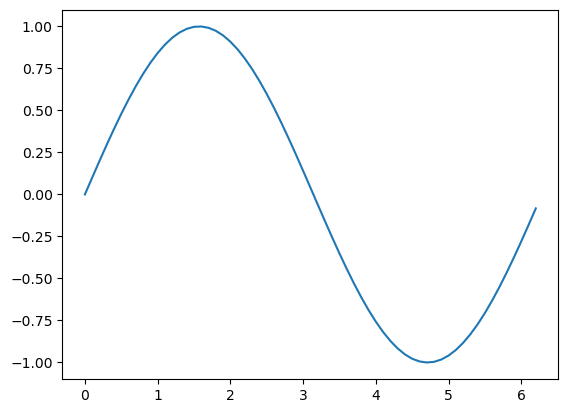

In [2]:
%matplotlib inline

plot = pyplot.plot(x,y)

### Still exploring but want some intereactivity

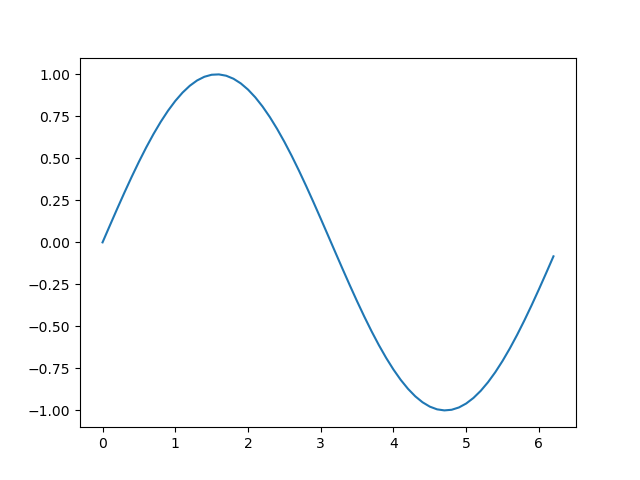

In [3]:
%matplotlib ipympl

plot = pyplot.plot(x,y)

### Quick and dirty customization....matplotlib still an app

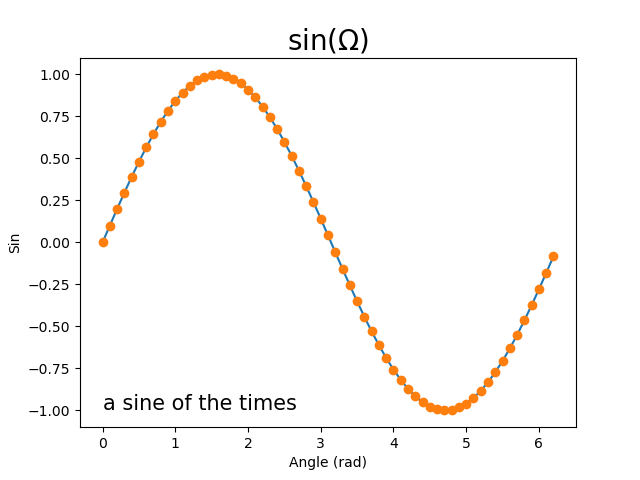

In [4]:
pyplot.text(0, -1, r'a sine of the times', fontsize=15)
pyplot.title(r'$\sin(\Omega)$', fontsize=20)
pyplot.xlabel('Angle (rad)')
pyplot.ylabel('Sin')
plot = pyplot.plot(x, y, 'o')
pyplot.show()

note: pandas and xarray have convenient built in plotting:
```
xarray.DataArray.plot()
```
or
```
pandas.DataFrame.plot()
```

### SubTIP 1:  Look into xarrays as data containers

## Fancy plots....don't use pyplot!

You can do many fancy things using the pyplot api, but it is designed for quick, best effort, plots not Fancy plots.  Don't abuse it to make Fancy plots.

Right away move over to the full matplotlib library "explicit" API.  Take the time to learn it and use it on a daily basis to get to know it.  The rest of the talk will be about the full matplotlib API and tips and tricks for using it.

### TIP 1: Use the full matplotlib API when making Fancy plots

This is  a great resource: https://colcarroll.github.io/yourplotlib/

and the associated youtube video of the Matplotlib team talk at PyData: https://www.youtube.com/watch?v=NV4Y75ZUDJA

### Axes and Figure

Note, `Axes` is singular, not plural.  It refers to the `Axes` object. This can be confusing at first.

It is convenient to use pyplot to spawn an empty figure, so the first step is

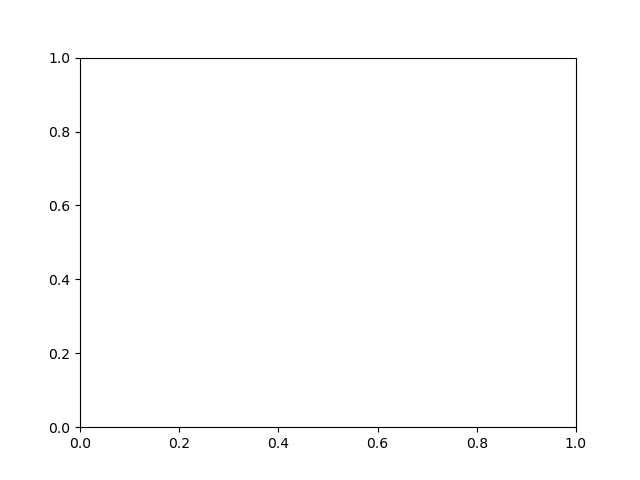

In [5]:
myfig, itsaxes = pyplot.subplots()

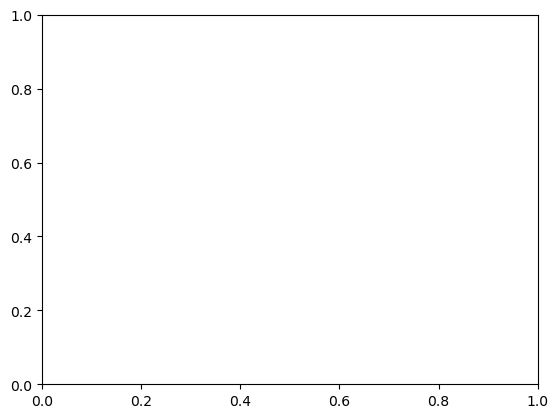

In [6]:
myfig

In [7]:
itsaxes

<Axes: >

The axes contains all the info that will go into each subplot of the figure.

e.g., to make the plot we did above

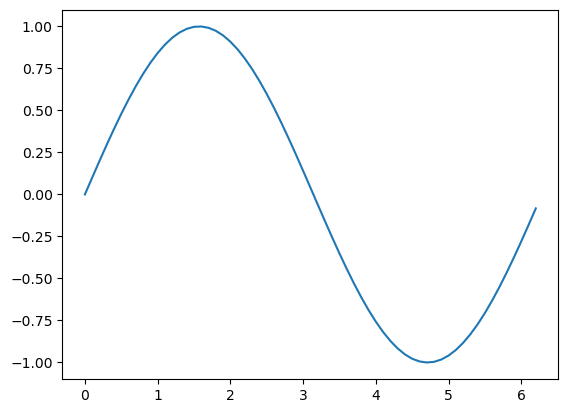

In [8]:
replot = itsaxes.plot(x,np.sin(x))
myfig

We could create the fis and the axes objects without using pyplot if we are feeling virtuous:

## Anatomy of a Matplotlib figure:
![alt text](./figures/matplotlib_figure.png "Title")

Let's make a new figure with less typing

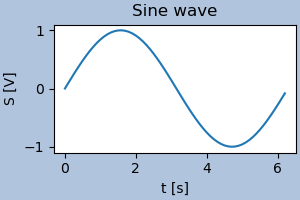

In [9]:
fig, ax = pyplot.subplots(figsize=(3,2), constrained_layout=True)

ax.plot(x, y)
ax.set_xlabel('t [s]')
ax.set_ylabel('S [V]')
ax.set_title('Sine wave')
fig.set_facecolor('lightsteelblue')

Let's see what's in the objects that we can play around with...

In [10]:
ax.get_xlabel()

't [s]'

In [11]:
ax.get_xmajorticklabels()

[Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6'),
 Text(8.0, 0, '8')]

You probably know this, but to interrogate what methods (functions) and attributes (variables) are available to use inside the `Axes` object, in jupyter you type the name of the object, type a period, and then hit the Tab button.  (e.g., in our case, in a code cell type `ax.` and then hit the Tab key once.  Wait a few seconds, and a list of all the available goodies inside the object will appear.

## TIP: Set up Global styles

Global styles are contained in a thing called rcParams, a big dictionary, and these can be modified.

The best is to use a stylesheet.

The Billinge group stylesheet is available as a python package:
```
conda install -c conda-forge bg-mpl-stylesheets
```
if you didn't already do it.

The main Billinge group style sheet looks a bit ugly in the Jupyter window.  It is designed to make the plots look good after they are reduced to single-column width figures in a 2-column format journal.   Plots that look good in Jupyter won't look good after reducing to single column format (and vice versa).  In principle we can make more than one style-sheet.  One to make things look good in Jupyter, one to make things look good in single column format, another to make figures look good in page-width in a printed document etc..   Below we will also learn how to customize the figures when the styelsheet needs some help.  But starting out with a style that suits your situation will save lots of work later.

Make your own style-sheet if you like.  Style-sheets are just text files containing all the default values for all the things.  To make this easier to share among group members and beyond we put our style-sheets into a GitHub repo and then released it on conda-forge.  This makes it very easy to share and install using the instructions above.  It also makes it easy to update or to add new style sheets.  In fact, we made it an open-source project on GitHub so if you would like the convenience of having your style-sheet shared in your group (and beyond), we would be delighted to have you reach out to us and we can help you add your style-sheet to the repo and release it.  Your users would then simply type `conda install -c conda-forge bg-mpl-stylesheets` to install (all) the stylesheets, then `from bg_mpl_stylesheet.your_mpl_stylesheet import your_mpl_style`

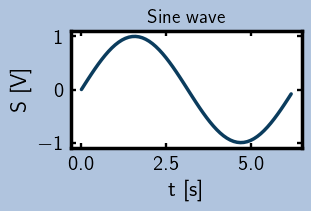

In [12]:
from bg_mpl_stylesheet.bg_mpl_stylesheet import bg_mpl_style
pyplot.style.use(bg_mpl_style)

fig, ax = pyplot.subplots(figsize=(3,2), constrained_layout=True)
ax.set_xlabel('t [s]')
ax.set_ylabel('S [V]')
ax.set_title('Sine wave')
fig.set_facecolor('lightsteelblue')
ax.plot(x, y)


Now we updated the global style to bg_mpl_style

modify whatever you want by updating rcParams

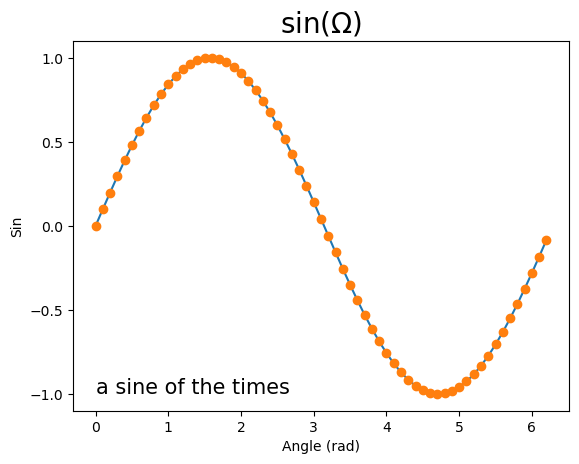

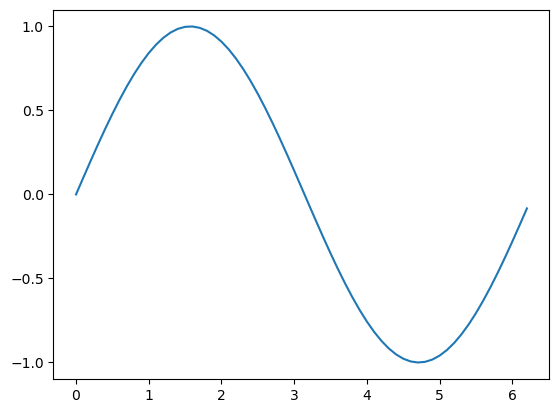

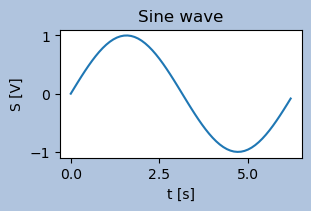

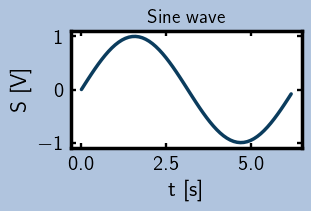

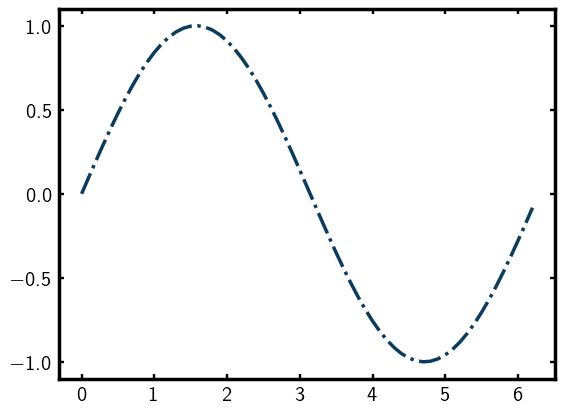

In [13]:
%matplotlib inline

pyplot.rcParams.update({
    "lines.linestyle": "dashdot",
})

fig, ax = pyplot.subplots()
ax.plot(x,y)


That looks nice with the billinge-group style but a dash dot default line style.  

However, the `mpl.rcparams` parameters are GLOBAL variables and so updating them causes the style to hang around forever.  To see this, try running one of the cells above that you already ran before (one that plots something)....

To avoid this behavior, and to avoid all kinds of headaches of applying and unapplying permanent styles, you can update parameters within a matplotlib context manager.  This is like the Python context manager you may have used for opening a file and reading/writing it.  See below for the code.  The updated parameters will apply to all the code that is indented, but won't live on outside of that "context".

Here we make the linewidth thicker and plot the same figure again.

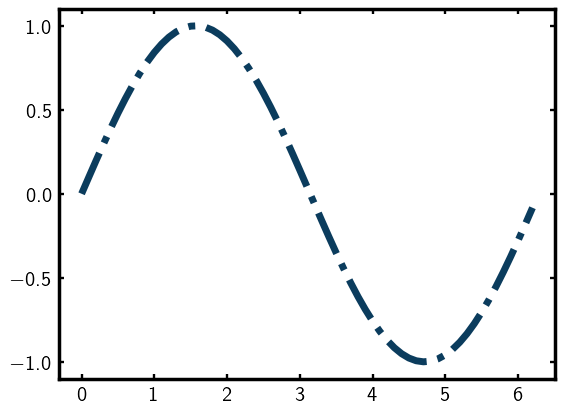

In [14]:
with pyplot.rc_context({'lines.linewidth': 5}):
    fig, ax = pyplot.subplots()
    ax.plot(x,y)


Then if we just step outside of the contex and plot the same figure again, we see that the original global style is still in operation....

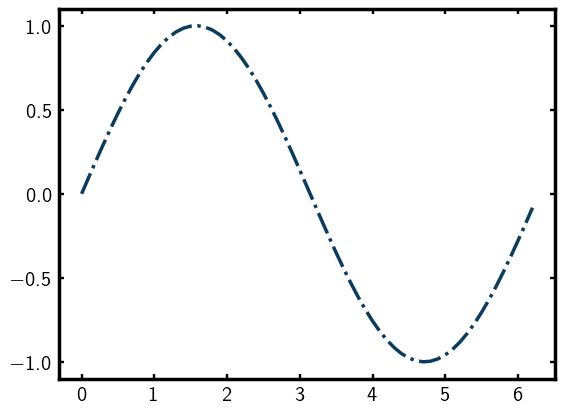

In [15]:
fig, ax = pyplot.subplots()
ax.plot(x,y)

In the next Jupyter Notebook we will give examples and tips for how to wrap your plotting code inside functions as a best practice.  It is possible to use a "function decorator" as a context manager that confines changes in `rcParams` to the local context within the function.  Look for `@mpl.rc_context({"font.size": 10})` in that jupyter notebook to see how to do this.

OK, we are done with this tutorial on the structure of matplotlib and how to control parameters.  Please now open and make your way through the worksheet `case-study.ipynb` in the `harmonic-oscillator` directory.